# Qiskit Notes - Circuits

In [1]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

# Circuit Basics

A basic workflow using Qiskit consists of two stages: __Build__ and __Run__. 

_Build_ allows you to make different quantum circuits that represent the problem you are solving

_Run_ that allows you to run them on different backends

In [2]:
import numpy as np
from qiskit import QuantumCircuit

## Building the Circuit

1st: Create the circuit

In [3]:
circ = QuantumCircuit(3)

After creating the circuit with its registers, one can add gate (__operations__) to manipulate the register. 

Ex: three-qubit GHZ state

$$
|\psi\rangle = (|000\rangle + |111\rangle)/\sqrt(2)
$$

By default, qubits are initialized to $|0\rangle$. 

$$
|000\rangle \\ 
\rightarrow
(H\otimes I \otimes I)|000\rangle = (|000\rangle+|100\rangle)/\sqrt(2) \\
\rightarrow
\text{CNOT}_{01} (|000\rangle+|100\rangle)/\sqrt(2) = (|000\rangle+|110\rangle)/\sqrt(2) \\
\rightarrow
\text{CNOT}_{02} (|000\rangle+|100\rangle)/\sqrt(2) = (|000\rangle+|111\rangle)/\sqrt(2)
$$

In [4]:
#add H-gate to put qubit in superposition
circ.h(0)

circ.cx(0,1)

circ.cx(0,2)

## Visualize Circuit

`QuantumCircuit.draw()`


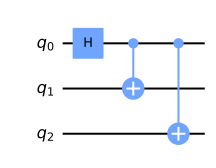

In [5]:
circ.draw('mpl')

<div class="alert alert-block alert-info">

<font color = 'black'>When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit j is labeled $Q_j$; In Qiskit, $n^\text{th}$ qubit is on the left side of the tensor product, with the basis vectors labeled $Q_{n-1} \otimes \cdots \otimes Q_1 \otimes Q_0$.</font>

<font color = 'black'>For instance, if $q_0, q_1,$ and $q2$ are on the states $0, 0, 1$, textbooks would represent this as $|001\rangle$, while in Qiskit this is represented as $|100\rangle$.</font>

<font color = 'black'>This affects matrix representation. $C_X$, for instance, becomes

$$ C_X = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 
\end{bmatrix}
$$

</font>
</div>
    
## Simulating circuits

To simulate a circuit we use the `quant_info` module in Qiskit.

The simulator returns the quantum state: $2^n$ vector $in \  \mathbb{C}$, $n$ qubits.

Two stages to the simulator:
1. set the input state
2. evolve the state by the quantum circuit


In [6]:
from qiskit.quantum_info import Statevector

## Set the initial state of the sim using from_int
n=3
state = Statevector.from_int(0,2**n)

## Evolve the state by the QC
state = state.evolve(circ)

## draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [7]:
# or, alternatively
from qiskit.visualization import array_to_latex

array_to_latex(state)

<IPython.core.display.Latex object>

__Visualization toolbox__

* plot qsphere
* hinton representing the $\mathbb{R}$ and $\mathbb{C}$ components of the state density matrix $\rho$.


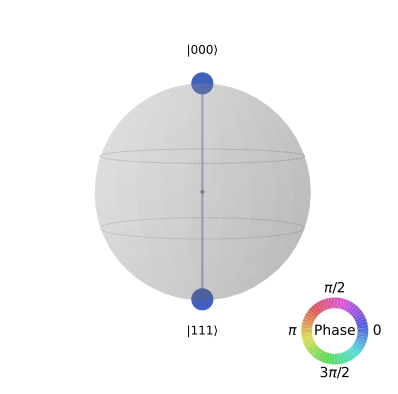

In [8]:
state.draw('qsphere')

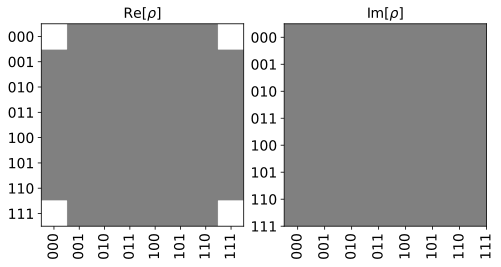

In [9]:
state.draw('hinton')

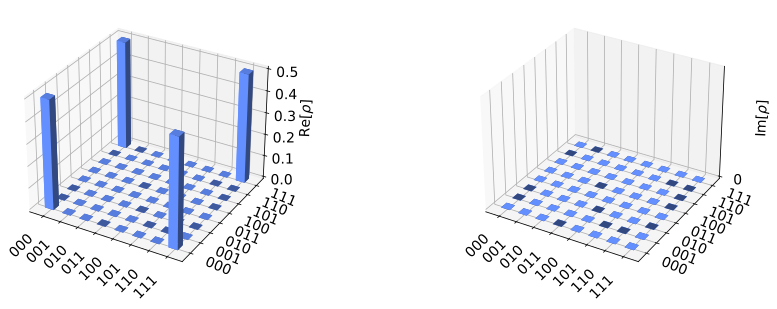

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(state)

## Unitary representation of a circuit

Operator method to make an unitary operator for the circuit: $2^n \times 2^n$  matrix.

In [11]:
from qiskit.quantum_info import Operator

U = Operator(circ)

U.data


array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [12]:
array_to_latex(U)

<IPython.core.display.Latex object>

## OpenQASM backend

The simulators are useful because they provide info about the __state output__ of the ideal circuit and the __matrix representation__.  However, in real experiments, we need to __measure__ each qubit (usually in the computational basis $|0\rangle$ and $|1\rangle$) to gain information about the state, causing the system to collapse to classical bits.

In the example above, suppose we make measurements of each qubit in the GHZ state:
$$
|\psi\rangle = (|000\rangle + |111\rangle)/\sqrt(2)
$$
and let $xyz$ denote the bitsttring that results (recall that in Qiskit, $x=$ result of $q_2$, etc.)

<div class="alert alert-block alert-info">
    <font color=black> Most significant bit (MSB) on the left and Least significant bit (LSB) on the right. This is why QIskit uses a <i>non-standard tensor product order</i></font>.
</div>

Probability is given by 

$$
P(xyz) = | \langle xyz| \psi \rangle |^2
$$

To simulate this, we use a different Aer backend.

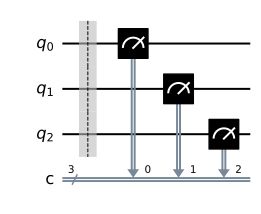

In [13]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

#map the measurement into classical bits
meas.measure(range(3), range(3)) ## q-> c

meas.draw('mpl')

# # The Qiskit circuit object supports composition.
# # Here the meas has to be first and front=True (putting it before)
# # as compose must put a smaller circuit into a larger one.


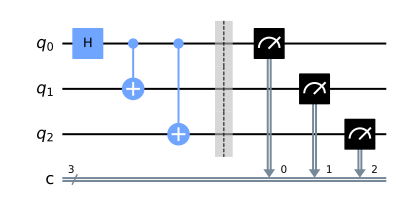

In [14]:
# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

qc.draw()

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

To simulate this circuit, we use the `qasm_simulator` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up __statistics about the distribution of the bitstrings__ (to, e.g., estimate $Pr(|000\rangle)$), we need to repeat the circuit many times. 

The number of times the circuit is repeated can be specified in the __execute function, via the shots keyword__.

In [15]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()

# first, we need to transpile the instructions of the QC
# to the low-level QASM instructions used by the backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator
# We've set the n of repeates to 1024, which is the default
job_sim = backend.run(qc_compiled, shots=1024)

result_sim = job_sim.result()

counts = result_sim.get_counts()
print(counts)

{'000': 524, '111': 500}


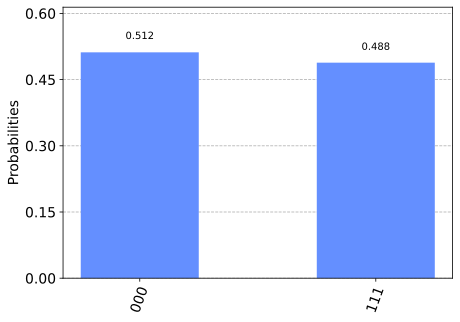

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Qiskit Visualizations

In [17]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## Plot histogram

To visualize the data from a quantum circuit run on a __real device__ or `qasm_simulator`: `plot_histogram(data)`

Ex: 2-qubit Bell state

{'11': 493, '00': 531}


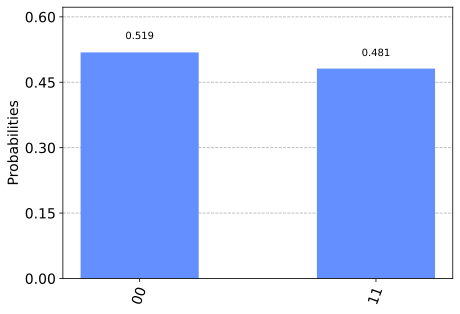

In [18]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)

meas = QuantumCircuit(2,2)
meas.measure(range(2),range(2))

# execute the QC
backend = BasicAer.get_backend('qasm_simulator')
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)



### Options when plotting a histogram

The `plot_histogram()` has a few options to adjust the output graph. 

* `legend` kwarg: used to provide a label for the executions. It takes a list of strings use to label each execution’s results. This is mostly useful when plotting multiple execution results in the same histogram. 

* `sort` kwarg: used to adjust the order the bars in the histogram are rendered. It can be set to either ascending order with `asc` or descending order with `desc`. 

* `number_to_keep` kwarg: takes an integer for the number of terms to show, the rest are grouped together in a single bar called rest. 

* `color` kwarg: adjusts the color of the bars, which either takes a string or a list of strings for the colors to use for the bars for each execution. 

* `bar_labels` kwarg: adjusts whether labels are printed above the bars or not. 

* `figsize` kwarg: takes a tuple of the size in inches to make the output figure.

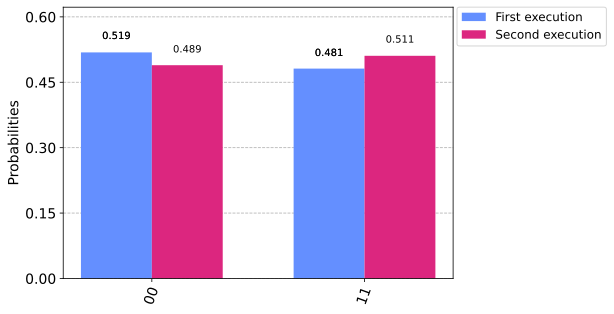

In [19]:
# Execute 2-qubit Bell state again

second_result = backend.run(transpile(circ, backend), shots=1024).result()
second_counts = second_result.get_counts()

legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

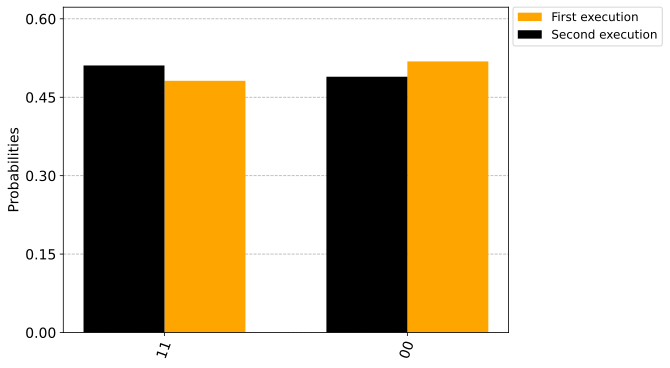

In [20]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', 
               figsize=(8,6), color=['orange', 'black'], bar_labels=False)
## and can obviously savefig, etc

## Plot State

In many situations you want to see the state of a quantum computer, for debugging. Here we assume you have this state (either from _simulation_ or _state tomography_) and the goal is to visualize the quantum state. __This requires exponential resources, so we advise to only view the state of small quantum systems__.

There are several functions:

`plot_state_city(quantum_state)`

`plot_state_qsphere(quantum_state)`

`plot_state_paulivec(quantum_state)`

`plot_state_hinton(quantum_state)`

`plot_bloch_multivector(quantum_state)`

A quantum state is either a state Hermitian matrix $\rho$ or a statevector $\psi$, such that the state matrix is given by
$$
\rho = |\psi \rangle \langle \psi|
$$

The state matrix is, in fact, more general, as it can represent _mixed states_, i.e., positive sum of statevectors,
$$
\rho = \sum_k p_k |\psi_k \rangle \langle \psi_k|
$$

The visualization functions are:

* `plot_state_city`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.

* `plot_state_qsphere`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

* `plot_state_paulivec`: The representation of the state matrix using Pauli operators as the basis $\rho = \sum_{q =0}^{d^2-1} p_j P_j/d$.

* `plot_state_hinton`: Same as 'city' but where the size of the element represents the value of the matrix element.

* `plot_bloch_multivector`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

In [21]:
from qiskit.visualization import plot_state_city, plot_state_qsphere
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_bloch_multivector

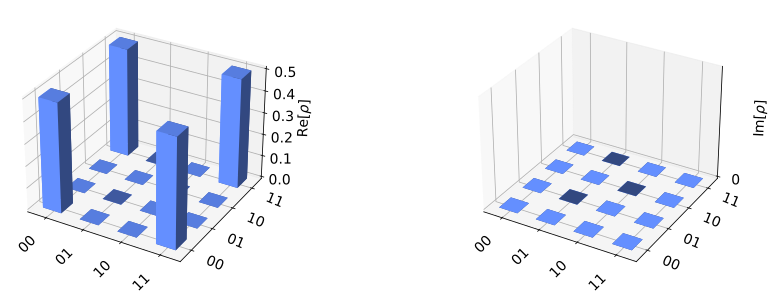

In [22]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator')
result = backend.run(transpile(bell, backend)).result()
psi = result.get_statevector(bell)

plot_state_city(psi)

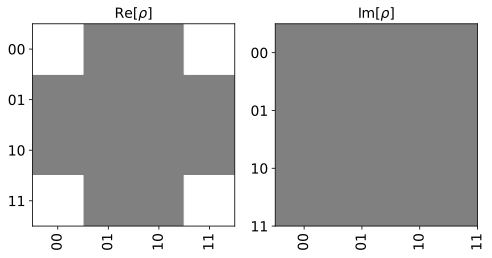

In [23]:
plot_state_hinton(psi)

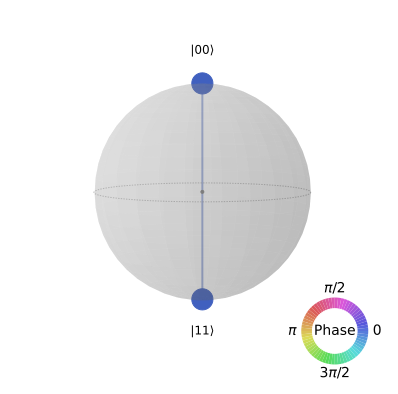

In [24]:
plot_state_qsphere(psi)

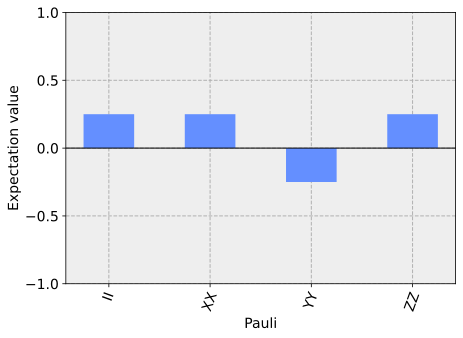

In [25]:
plot_state_paulivec(psi)

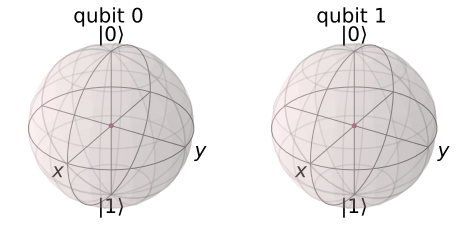

In [26]:
plot_bloch_multivector(psi)

Here we see that there is _no information_ about the quantum state in the single qubit space as _all vectors are zero_.

### Options when using state plotting functions

#### plot_state_city()

* `title (str)`: a string that represents the plot title

* `figsize (tuple)`: figure size in inches (width, height).

* `color (list)`: a list of len=2 giving colors for real and imaginary components of matrix elements.

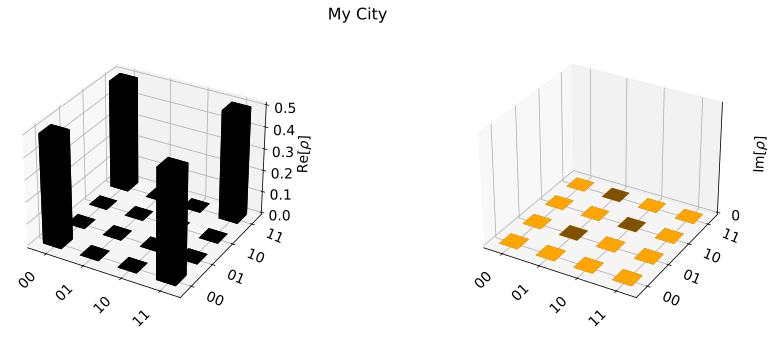

In [27]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

#### plot_state_hinton()

* `title (str)`: a string that represents the plot title

* `figsize (tuple)`: figure size in inches (width, height).

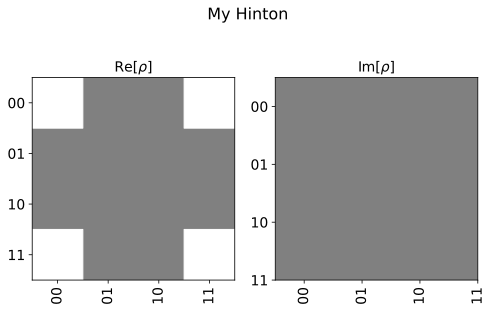

In [28]:
plot_state_hinton(psi, title='My Hinton')

#### plot_state_paulivec()

* `title (str)`: a string that represents the plot title

* `figsize (tuple)`: figure size in inches (width, height).

* `color (list)`: color of the expectation value bars.

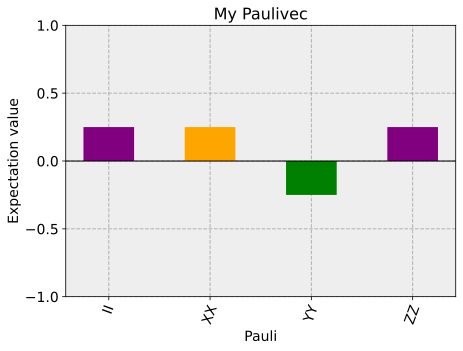

In [29]:
plot_state_paulivec(psi, title='My Paulivec', color=['Purple', 'Orange', 'Green'])

#### plot_state_qsphere()

* `figsize (tuple)`: figure size in inches (width, height).

#### plot_bloch_multivector()

* `title (str)`: a string that represents the plot title

* `figsize (tuple)`: figure size in inches (width, height).

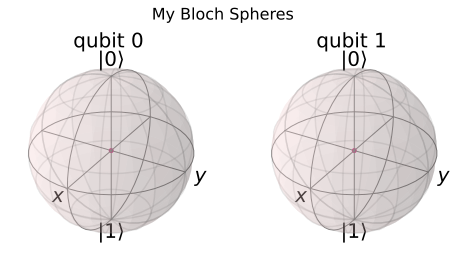

In [30]:
plot_bloch_multivector(psi, title='My Bloch Spheres')

## Plot Bloch Vector

Standard way of plotting a quantum system of a __single qubit__ with the input as a Bloch vector.

Bloch Vectors:
$$
x = \mathrm{Tr}[X\rho], \ \ \
y = \mathrm{Tr}[Y\rho], \ \ \
z = \mathrm{Tr}[Z\rho], \ \ \
$$


In [31]:
from qiskit.visualization import plot_bloch_vector

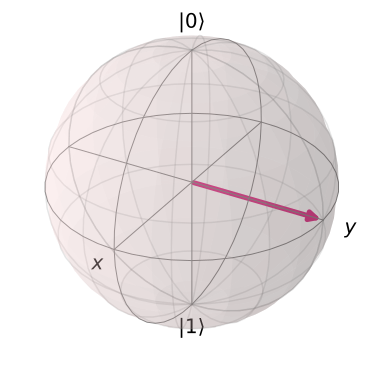

In [32]:
plot_bloch_vector([0,1,0])

### Options for plot_bloch_vector()

* `title (str)`: a string that represents the plot title

* `figsize (tuple)`: figure size in inches (width, height).

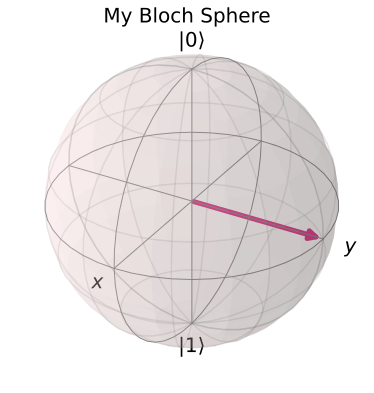

In [33]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

# Summary of Quantum Operations

Review of the different operations that are available in Qiskit Terra:

* Single-qubit quantum gates

* Multi-qubit quantum gates

* Measurements

* Reset

* Conditionals

* State initialization

We will also see how to use the three different simulators:

* `unitary_simulator`

* `qasm_simulator`

* `statevector_simulator`

In [34]:
import matplotlib.pyplot as plt
import numpy as no
from math import pi

In [35]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## Single-Qubit Quantum States

Single qubit:

$$
|\psi\rangle = \alpha|0\rangle + \beta |1\rangle = 
\begin{pmatrix}
\alpha\\
\beta
\end{pmatrix}, \ \ \ \alpha, \beta \in \mathbb{C}, \ \ \ 
\text{with } |\alpha|^2 + |\beta|^2 = 1 \text{ and }
|\psi\rangle := e^{i\delta}|\psi\rangle
$$

requiring only two real numbers to describe a single qubit quantum state.

A convenient representation is
$$
|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin{\theta/2} |1\rangle, \ \ \ 
\text{where } 0\leq \theta \leq \pi, \ 0\leq \phi < 2\pi
$$
showing a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and points in the surface of a unit sphere ($\mathbb{R}^3$): __Bloch sphere__.

Quantum gates/operations are usually repesented as matrices. 

* acting on a single qubit: $2\times 2$ unitary matrix $U \longrightarrow|\psi'\rangle = U |\psi\rangle$

A general unitary must be able to take $|0\rangle$ to the above state,

$$
U = 
\begin{pmatrix}
\cos(\theta/2) & a\\
e^{i\phi}\sin{\theta/2} & b
\end{pmatrix}
$$

where $a$ and $b in \mathbb{C}$ are constrained by unitarity, $U^\dagger U=I$, for all $0\leq \theta \leq \pi, \ 0\leq \phi < 2\pi$. This implies $a \rightarrow - e^{i\lambda}\sin{\theta/2}$ and $b \rightarrow e^{i(\lambda+\phi)}\cos{\theta/2}, 0\leq \lambda < 2\pi$,

$$
U = 
\begin{pmatrix}
\cos(\theta/2) & - e^{i\lambda}\sin{\theta/2}\\
e^{i\phi}\sin{\theta/2} & e^{i(\lambda+\phi)}\cos{\theta/2}
\end{pmatrix}
$$

which is __the most general form of a single qubit unitary__.

## Single-Qubit Gates

The single-qubit gates available are: 
* u gates 
* Identity gate 
* Pauli gates 
* Clifford gates 
* $C3$ gates 
* Standard rotation gates

In [36]:
q = QuantumRegister(1)

### u gates

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda)
$$

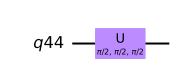

In [37]:
qc = QuantumCircuit(q)
qc.u(pi/2, pi/2, pi/2, q)
qc.draw()

In [38]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

#### u2-gate

The $u2(\phi, \lambda) = u3(\pi/2,\phi, \lambda)$ gate has the form
$$u2(\phi, \lambda) = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & - e^{i\lambda}\\
e^{i\phi} & e^{i(\lambda+\phi)}
\end{pmatrix}
$$
__which is useful to create superpositions__.

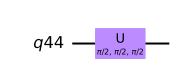

In [39]:
qc = QuantumCircuit(q)
#qc.u2(pi/2, pi/2, q) ## deprecated
qc.u(pi/2, pi/2, pi/2, q)
qc.draw()

In [40]:
job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

#### p- (or u1-) gate

$$
p(\lambda) = u(0,0,\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda}
\end{pmatrix}
$$
__which is useful to apply a quantum phase__.

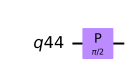

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [41]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Identity gate

$I = u0(1)$


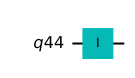

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [42]:
qc = QuantumCircuit(q)
qc.id(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Pauli gates

#### X: bit-flip gate

$$
X = 
\begin{pmatrix}
0& 1 \\
1 & 0
\end{pmatrix}
= u3(\pi, 0, \pi)
$$

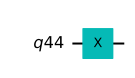

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [43]:
qc = QuantumCircuit(q)
qc.x(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### Y: bit- and phase flip gate

$$
Y = 
\begin{pmatrix}
0& -i \\
i & 0
\end{pmatrix}
= u3(\pi, \pi/2, \pi/2)
$$

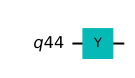

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [44]:
qc = QuantumCircuit(q)
qc.y(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### Z: phase flip gate

$$
Z = 
\begin{pmatrix}
1& 0 \\
0 & -1
\end{pmatrix}
= u1(\pi)
= u3(0, 0, \pi)
$$

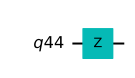

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [45]:
qc = QuantumCircuit(q)
qc.z(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Clifford gates

#### Hadamard gate

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1& 1 \\
1 & -1
\end{pmatrix}
= u2(0,\pi)
= u3(\pi/2, 0, \pi)
$$

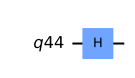

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

In [46]:
qc = QuantumCircuit(q)
qc.h(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### $S$, or $\sqrt{Z}$ phase, gate

$$
S = 
\begin{pmatrix}
1& 0 \\
0 & i
\end{pmatrix}
= u1(\pi/2)
= u3(0, 0, \pi/2)
$$

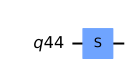

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [47]:
qc = QuantumCircuit(q)
qc.s(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### $S^\dagger$ , or conjugate of $\sqrt{Z}$ phase, gate

$$
S^\dagger = 
\begin{pmatrix}
1& 0 \\
0 & -i
\end{pmatrix}
= u1(-\pi/2)
= u3(0, 0, -\pi/2)
$$

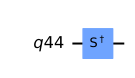

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

In [48]:
qc = QuantumCircuit(q)
qc.sdg(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### $C3$ gates

#### $T$, or $\sqrt{S}$ phase, gate

$$
T = 
\begin{pmatrix}
1& 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
=
\begin{pmatrix}
1& 0 \\
0 & \frac{1}{\sqrt{2}}(1+i)
\end{pmatrix}
= u1(\pi/4)
= u3(0, 0, \pi/4)
$$

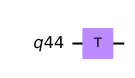

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

In [49]:
qc = QuantumCircuit(q)
qc.t(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### $T^\dagger$, or conjugate of $\sqrt{S}$ phase, gate

$$
T^\dagger = 
\begin{pmatrix}
1& 0 \\
0 & e^{-i\pi/4}
\end{pmatrix}
=
\begin{pmatrix}
1& 0 \\
0 & \frac{1}{\sqrt{2}}(1-i)
\end{pmatrix}
= u1(-\pi/4)
= u3(0, 0, -\pi/4)
$$

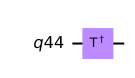

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

In [50]:
qc = QuantumCircuit(q)
qc.tdg(q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Standard rotation gates

Defined around the Paulis $P={X, Y, Z}$,

$$
R_P(\theta) = \exp(- i\theta P/2) = \cos(\theta/2) I - i \sin(\theta/2)P
$$

#### Rotation around X-axis

$$
R_X(\theta) = \cos(\theta/2) I - i \sin(\theta/2)X = 
\begin{pmatrix}
\cos(\theta/2) & - i \sin(\theta/2) \\
-i \sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
= u3(\theta, -\pi/2, -\pi/2)
$$

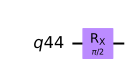

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

In [51]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### Rotation around Y-axis

$$
R_Y(\theta) = \cos(\theta/2) I - i \sin(\theta/2)Y = 
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
= u3(\theta, 0, 0)
$$

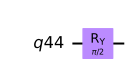

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

In [52]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

#### Rotation around Z-axis

__Global phase only__

$$
R_Y(\theta) = \cos(\theta/2) I - i \sin(\theta/2)Z = 
\begin{pmatrix}
\cos(\theta/2) - i \sin(\theta/2) & 0 \\
0 & \cos(\theta/2) + i \sin(\theta/2)
\end{pmatrix}
=
\begin{pmatrix}
e^{-i\theta/2} & 0 \\
0 & e^{i\theta/2}
\end{pmatrix}
= u1(\theta)
$$

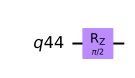

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

In [53]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

## Multi_Qubit Gates

The two-qubit gates are: 
* controlled Pauli gates 
* controlled Hadamard gate
* controlled rotation gates 
* controlled phase gate 
* controlled u3 gate 
* swap gate

The three-qubit gates are: 
* Toffoli gate 
* Fredkin gate

### Mathematical Preliminaries

Space of a QC grows exponentially with the number of qubits $n$: complex vector space has dimension $d=2^n$. __Tensor product__ glues together operators and basis vectors.

Consider a 2-qubit system. Given that $A$ and $B$ are operators acting on a single qubit, the joint operator $A \otimes B$ acting on two qubits is:

$$
A \otimes B =
\begin{pmatrix}
A_{00}
\begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix}
&
A_{01}
\begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix}
\\
A_{10}
\begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix}
&
A_{11}
\begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix}
\end{pmatrix}
$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:

$$
|00\rangle = 
\begin{pmatrix}
1
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\\
0
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
1\\
0\\
0\\
0
\end{pmatrix}
\ \ \ \ \ 
|01\rangle = 
\begin{pmatrix}
1
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\\
0
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
0\\
1\\
0\\
0
\end{pmatrix} 
\\ %end of line
|10\rangle = 
\begin{pmatrix}
0
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\\
1
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
0\\
0\\
1\\
0
\end{pmatrix}
\ \ \ \ \ 
|11\rangle = 
\begin{pmatrix}
0
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\\
1
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
0\\
0\\
0\\
1
\end{pmatrix}
$$

The state of a $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors, $|0\rangle \otimes \cdots \otimes |0\rangle = |0 \cdots 0\rangle$

__Basis ordering__: remember that in Qiskit $q_0$ is the rightmost one, contrary to the standard books notation. __This affects the matrix representation__ in Qiskit.

### Controlled operation on qubits

__Controlled gates__: A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. 

## Two-qubit Gates

The two-qubit gates are: 
* controlled Pauli gates 
* controlled Hadamard gate
* controlled rotation gates 
* controlled phase gate 
* controlled u3 gate 
* swap gate

Most of the que-qubit gates are of the controlled type (the `swap`-gate being the exception).

In general: $C_U$ acts to apply the single-qubit unitary $U$ to 2nd qubit when the state of the first one is $|1\rangle$.

Suppose U has a matrix representation:

$$
U=
\begin{pmatrix}
u_{00} & u_{01}\\
u_{10} & u_{11}
\end{pmatrix}
$$

Suppose the __control qubit__ is __qubit 0__ (the one on the RHS of the tensor product in Qiskit notation). Then:

$$
C_U : \underset{\text{qubit 1}}{|0\rangle} \otimes \underset{\text{qubit 0}}{|0\rangle} 
\longrightarrow |0\rangle \otimes |0\rangle \\
C_U : \underset{\text{qubit 1}}{|0\rangle} \otimes \underset{\text{qubit 0}}{|1\rangle} 
\longrightarrow U|0\rangle \otimes |0\rangle \\
C_U : \underset{\text{qubit 1}}{|1\rangle} \otimes \underset{\text{qubit 0}}{|0\rangle} 
\longrightarrow |0\rangle \otimes |0\rangle \\
C_U : \underset{\text{qubit 1}}{|1\rangle} \otimes \underset{\text{qubit 0}}{|1\rangle} 
\longrightarrow U|0\rangle \otimes |0\rangle 
$$,

which, in matrix form, corresponds to
$$
C_U = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11} 
\end{pmatrix}
$$

To work out these matrix elements, let

$$
C_{(jk),(lm)}= 
\left(
\underset{\text{qubit 1}}{\langle j|} \otimes \underset{\text{qubit 0}}{\langle k|}
\right)
C_U
\left(
\underset{\text{qubit 1}}{|l\rangle} \otimes \underset{\text{qubit 0}}{|m\rangle|}
\right)
$$
compute the action of $C_U$ and the inner products.

If the __control qubit__ is __qubit 1__ :

$$
C_U : \underset{\text{qubit 1}}{|0\rangle} \otimes \underset{\text{qubit 0}}{|0\rangle} 
\longrightarrow |0\rangle \otimes |0\rangle \\
C_U : \underset{\text{qubit 1}}{|0\rangle} \otimes \underset{\text{qubit 0}}{|1\rangle} 
\longrightarrow |0\rangle \otimes |0\rangle \\
C_U : \underset{\text{qubit 1}}{|1\rangle} \otimes \underset{\text{qubit 0}}{|0\rangle} 
\longrightarrow |0\rangle \otimes U|0\rangle \\
C_U : \underset{\text{qubit 1}}{|1\rangle} \otimes \underset{\text{qubit 0}}{|1\rangle} 
\longrightarrow |0\rangle \otimes U|0\rangle 
$$,

which, in matrix form, corresponds to
$$
C_U = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00}  & u_{01} \\
0 & 0 & u_{10}  & u_{11} 
\end{pmatrix}
$$

In [54]:
q = QuantumRegister(2)

### Controlled Pauli gates

#### Controlled-X (Controlled-NOT) gate

Flips the target if the control is in $|1\rangle$. 

If we take the __MSB__ as the control (`cx(q[1],q[0])`), the matrix is
$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`cx(q[0],q[1])`), the matrix is
$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}
$$

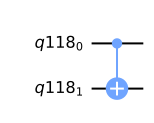

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [55]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)


#### Controlled-Y  gate

Applies the Y-gate to the target if the control is in $|1\rangle$. 

If we take the __MSB__ as the control (`cy(q[1],q[0])`), the matrix is
$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`cy(q[0],q[1])`), the matrix is
$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & -i \\
0 & 0 & 1 & 0 \\
0 & i & 0 & 0 \\
\end{pmatrix}
$$

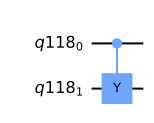

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

In [56]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)


#### Controlled-Z (Controlled-phase) gate

Applies the Z-gate to the target if the control is in $|1\rangle$. 

If we take the __MSB__ as the control (`cz(q[1],q[0])`), the matrix is
$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`cz(q[0],q[1])`), the matrix is
$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{pmatrix}
$$

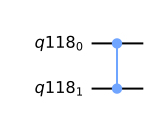

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [57]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)


### Controlled Hadamard gate

Applies the Hadamard-gate to the target if the control is in $|1\rangle$. 

If we take the __MSB__ as the control (`ch(q[1],q[0])`), the matrix is
$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`ch(q[0],q[1])`), the matrix is
$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
0 & 0 & 1 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
\end{pmatrix}
$$

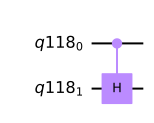

array([[ 1.   -0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

In [58]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)


### Controlled rotation gates

#### Controlled rotation around Z-axis

Applies the Z-gate to the target if the control is in $|1\rangle$. 

If we take the __MSB__ as the control (`crz(q[1],q[0])`), the matrix is
$$
C_{R_Z}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & e^{-i\lambda/2} & 0 \\
0 & 0 & 0 & e^{-i\lambda/2} \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`crz(q[0],q[1])`), the matrix is
$$
C_{R_Z}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & e^{-i\lambda/2} & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\lambda/2} \\
\end{pmatrix}
$$

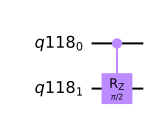

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

In [59]:
qc = QuantumCircuit(q)
qc.crz(pi/2, q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

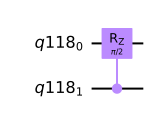

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 1.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

In [60]:
qc = QuantumCircuit(q)
qc.crz(pi/2, q[1],q[0])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Controlled phase rotation

Performs a phase rotation if both qubits are in the $|11\rangle$ state. The matrox look the same for __MSB__ and __LSB__:

$$
C_{p}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{-i\lambda/2} \\
\end{pmatrix}
$$


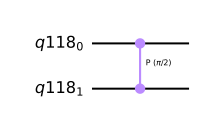

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [61]:
qc = QuantumCircuit(q)
qc.cp(pi/2, q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Controlled u3 gate

Perform controlled-$u3$ rotation on the target qubit if the control qubit is $|1\rangle$.

If we take the __MSB__ as the control (`cu3(q[1],q[0])`), the matrix is
$$
C_{u}(\theta,\phi,\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & -e^{-i(\phi-\lambda)/2}\sin(\theta/2) \\
0 & 0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & e^{i(\phi+\lambda)/2}\cos(\theta/2) \\
\end{pmatrix}
$$

If we take the __LSB__ as the control (`cu3(q[0],q[1])`), the matrix is
$$
C_{u}(\theta,\phi,\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2) \\
0 & 0 & 1 & 0 \\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2) \\
\end{pmatrix}
$$

<ipython-input-62-5cc2df86b7ca>:2: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  qc.cu3(pi/2, pi/2, pi/2, q[0],q[1])


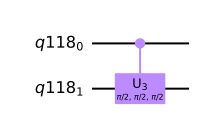

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   ,  0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.   +0.707j,  0.   +0.j   , -0.707-0.j   ]])

In [62]:
qc = QuantumCircuit(q)
qc.cu3(pi/2, pi/2, pi/2, q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

<ipython-input-63-588b2cad1e54>:2: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  qc.cu3(pi/2, pi/2, pi/2, q[1],q[0])


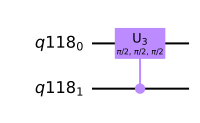

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.707+0.j   ,  0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   , -0.   +0.707j, -0.707-0.j   ]])

In [63]:
qc = QuantumCircuit(q)
qc.cu3(pi/2, pi/2, pi/2, q[1],q[0])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Swap gate

The SWAP gate exchanges the two qubits.

$$
\text{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
$$

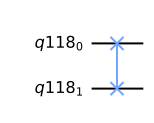

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [64]:
qc = QuantumCircuit(q)
qc.swap(q[0],q[1])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

## Three-qubit Gates

The three-qubit gates are: 
* Toffoli gate 
* Fredkin gate

For three qubits, the basis vectors are ordered as:
$$
|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle 
$$
which, in bitstrings, represent the integers $0, \cdots, 7$. 

In Qiskit:
$$
|abc\rangle=
\underset{\text{qubit 2}}{|a\rangle} \otimes
\underset{\text{qubit 1}}{|b\rangle} \otimes
\underset{\text{qubit 0}}{|c\rangle} 
$$

### Toffoli gate

Flips the 3rd qubit if the first two (__LSB__) are both $|1\rangle$.
$$
|abc\rangle= |bc \oplus a\rangle \otimes |b\rangle \otimes |c\rangle
$$

In matrix form:
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

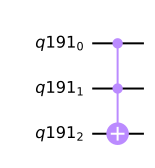

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [65]:
q = QuantumRegister(3)

qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

### Fredkin gate - Controlled swap gate

Exchanges the second and third qubits if the first qubit (__LSB__) is $1\rangle$.

$$
|abc\rangle \rightarrow 
\begin{cases}
|bac \rangle & \text{ if } c=1\\
|abc \rangle & \text{ if } c=0
\end{cases}
$$

In matrix form:

$$
C_{\text{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
$$

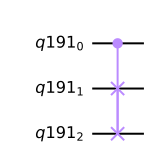

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

In [66]:
qc = QuantumCircuit(q)
qc.cswap(q[0],q[1],q[2])
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_unitary(qc, decimals=3)

## Non-unitary Operations

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include 
* measurements, 
* reset of qubits, and 
* classical conditional operations.



In [67]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### Measurement

We don’t have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. 

Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

In [68]:
qc = QuantumCircuit(q,c)
qc.measure(q,c)
display(qc.draw)

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc,backend))
job.result().get_counts(qc)

## The simulator predicts that 100 percent of the time the classical register returns 0.

<bound method QuantumCircuit.draw of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f7e1d9473a0>>

{'0': 1024}

In [69]:
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
display(qc.draw)

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc,backend))
job.result().get_counts(qc)

# The simulator predicts that 50 percent of the time the classical register returns 0 or 1.

<bound method QuantumCircuit.draw of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f7e1d981100>>

{'1': 532, '0': 492}

### Reset of qubits

It is also possible to reset qubits to the $|0\rangle$ state in the middle of computation. Note that __reset is not a Gate operation, since it is irreversible__.

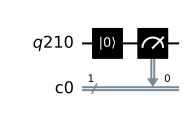

{'0': 1024}

In [70]:
qc = QuantumCircuit(q,c)
qc.reset(q[0])
qc.measure(q,c)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_counts()

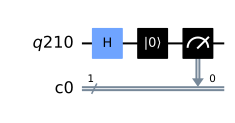

{'0': 1024}

In [71]:
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.reset(q[0])
qc.measure(q,c)
display(qc.draw())

job = backend.run(transpile(qc,backend))
job.result().get_counts()

__Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.__

### Classical conditional operations

It is also possible to do __operations conditioned on the state of the classical register__.

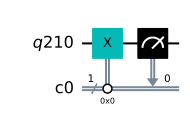

{'1': 1024}

In [72]:
qc = QuantumCircuit(q,c)
qc.x(q[0]).c_if(c,0) ##
qc.measure(q,c)
display(qc.draw())

job=backend.run(transpile(qc,backend))
job.result().get_counts(qc)

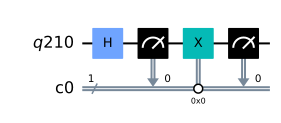

{'1': 1024}

In [73]:
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c,0) ##
qc.measure(q,c)
display(qc.draw())

job=backend.run(transpile(qc,backend))
job.result().get_counts(qc)

The __classical bit by the first measurement is random__ but the conditional operation results in the __qubit being deterministically put into $|1\rangle$__.

## Arbitrary Initialization

What if we want to initialize a qubit register to an arbitrary state?

$n$ qubits, $2^n$ amplitudes, normalized to 1. For instance:

$$
|\psi\rangle = \frac{i}{4}|000\rangle + \frac{1}{\sqrt{8}}|001\rangle +
\frac{1+i}{4}|010\rangle + \frac{1+2i}{\sqrt{8}}|101\rangle + \frac{1}{4}|110\rangle
$$

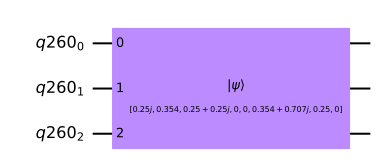

In [74]:
## Initializing a 3-qubit quantum state
import math

#list with the desired vector in terms of the basis states
desired_vector=[
    1/math.sqrt(16)*complex(0,1),
    1/math.sqrt(8)*complex(1,0),
    1/math.sqrt(16)*complex(1,1),
    0,
    0,
    1/math.sqrt(8)*complex(1,2),
    1/math.sqrt(16)*complex(1,0),
    0
    ]

q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]]) # desired vector,list of qubits 

qc.draw()

In [75]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
array_to_latex(qc_state)

<IPython.core.display.Latex object>

#### Fidelity

__Fidelity__ is useful to check whether two states are the same or not. For quantum (pure) states $|\psi_1\rangle$ and
$|\psi_2\rangle$, the fidelity is 

$$
F(|\psi_1\rangle,|\psi_2\rangle) = |\psi_1 \langle |\psi_2 \rangle|^2 =
\begin{cases}
1 & \text{ if states are the same}\\
< 1 & \text{ if states are different}
\end{cases}
$$

In [76]:
state_fidelity(desired_vector, qc_state)

1.0

### Further details

How does the desired state get generated behind the scenes? There are multiple methods for doing this. Qiskit uses a method proposed by Shende et al, <a href="https://arxiv.org/abs/quant-ph/0406176">[Synthesis of Quantum Logic Circuits, 2006]</a>. 

The idea is to assume the quantum register to have started from our desired state, and construct a circuit that takes it to the $|00\cdots0\rangle$ state. The initialization circuit is then the reverse of such circuit.

To take an arbitrary quantum state to the zero state in the computational basis, we perform an __iterative procedure that disentangles qubits from the register one-by-one__. We know that any arbitrary single-qubit state $|\rho\rangle$ can be taken to $|0\rangle$  using 
1. a $\phi$-degree rotation around the Z-axis
2. followed by a $\theta$-degree rotation around the Y-axis
$$
R_y(-\theta)R_z(-\phi)|\rho\rangle = re^{it}|0\rangle .
$$

Since now we are dealing with $n$ qubits, we must factorize the state vector to separate the __LSB__


\begin{align}
|\psi\rangle  & =   \alpha_{0_0}|0\cdots00\rangle+\alpha_{0_1}|0\cdots01\rangle + \cdots +
\alpha_{{2^{n-1}-1}_0}|1\cdots10\rangle + \alpha_{{2^{n-1}-1}_1}|1\cdots11\rangle \\
& = 
|0\cdots00\rangle(\alpha_{0_0}|0\rangle + \alpha_{0_1}|1\rangle) + \cdots +
|1\cdots1\rangle (\alpha_{{2^{n-1}-1}_0}|0\rangle + \alpha_{{2^{n-1}-1}_1}|1\rangle) \\
& =
|0\cdots00\rangle|\rho_0\rangle + \cdots +
|1\cdots1\rangle |\rho_{2^{n-1}-1}\rangle
\end{align}

And now each fo the $|\rho_{2^{n-1}-1}\rangle$ cand be taken to $|0\rangle$ by finding the appropriate $\phi$ and $\theta$ angles. For all states: unitary that disentangles the LSB:

$$
U = 
\begin{pmatrix}
R_y(-\theta_0)R_z(-\phi_0) & & & \\
& R_y(-\theta_0)R_z(-\phi_0) & & \\
& & \ddots & \\
 & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix}
$$

and 

$$
U|\psi\rangle = 
\begin{pmatrix}
r_0e^{it_0}\\
r_1e^{it_1}\\
\vdots\\
r_{2^{n-1}-1}e^{it_{2^{n-1}-1}}\\
\end{pmatrix}
\otimes |0\rangle
$$

U can be implemented as a __quantum multiplexor__ gate (defined in the reference by Shende above), since it is a block diagonal matrix. In the quantum multiplexor formalism, a block diagonal matrix of size $2^n \times2^n$ consisting of $2^s$ blocks is equivalent to a multiplexor with $s$ selected qubits and $n-s$ data qubits. It can be implemented after recursive decomposition to primitive gates of `cx`, `rz`, and `ry`.